# Notebook για κώδικα Raytracing
#### Αρχείο Jupyter notebook

In [53]:
import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt

# Screen size (in pixels)
Cw = 1000
Ch = 1000
BACKGROUND_COLOR = (255, 255, 255)
# Viewport size (βλ. σελ. 16)
Vw = 1          
Vh = 1
d = 1           # Η απόσταση της κάμερας από το επίπεδο προβολής (το εστιακό μήκος, focal length)


class Sphere():
    def __init__(self, center, radius, color):
        self.center = center
        self.radius = radius
        self.color = color
    def __repr__(self) -> str:
        return('A sphere centered at {}, with radius {} and color {}.'.format(self.center, self.radius, self.color))

class Framebuffer():
    def __init__(self, height=Ch, width=Cw):
        #super(Framebuffer, self).__init__(xx)
        self.data = np.zeros([height, width, 3])

    def putPixel(self, x, y, color):
        # Αυτή η συνάρτηση 'βάφει' το pixel στις συντεταγμένες (x,y) με το χρώμα 'color'. 
        # To 'color' πρέπει να είναι τριάδα τιμών, πχ: (255, 0, 0) για το κόκκινο, ή (127, 127, 127) για γκρί.
        # img είναι ο πίνακας που αντιστοιχεί στην ψηφιογραφική εικόνα (raster image) που θέλουμε να επεξεργαστούμε.
        imagedimensions = self.data.shape
        x1 = x + imagedimensions[1] // 2
        y1 = -y + imagedimensions[0] // 2
        if(y1 < 0 or y1 >= imagedimensions[0]):
            return
        if(x1 < 0 or x1 >= imagedimensions[1]):
            return
        self.data[y1, x1, :] = np.array(color)

    def show(self):
        #plt.imshow(self.data, interpolation='bilinear')
        plt.imshow(self.data)
        plt.show()
        


# Τα αντικείμενα της σκηνής
scene_spheres = [ 
    Sphere(center=(0, -1, 3), radius=1, color=(255, 0, 0)),
    Sphere(center=(2,  0, 4), radius=1, color=(0, 0, 255)),
    Sphere(center=(-2, 0, 4), radius=1, color=(0, 255, 0)),
]


def canvasToViewPort(x, y):
    '''
    Αυτή η συνάρτηση θα μετατρέψει τις συντεταγμένες οθόνης σε συντεταγμένες κόσμου (ΣΣΚ, WCS).
    '''
    return(x*Vw/Cw, y*Vh/Ch, d)

def intersectRaySphere(O, D, sphere):
    def dot(a,b):
        return(a[0]*b[0] + a[1]*b[1] + a[2]*b[2])

    r = sphere.radius
    CO = O - sphere.center
    a = dot(D, D)
    b = 2*dot(CO, D)
    c = dot(CO, CO) - r*r

    discriminant = b*b - 4*a*c
    if discriminant < 0:
        return(np.inf, np.inf)
    
    t1 = (-b + np.sqrt(discriminant)) / (2*a)
    t2 = (-b - np.sqrt(discriminant)) / (2*a)
    return t1, t2

def traceRay(O, D, t_min, t_max):
    closest_t = np.inf 
    closest_sphere = None
    for sphere in scene_spheres:
        t1, t2 = intersectRaySphere(O, D, sphere)
        if t1 >= t_min and t1 <= t_max and t1 < closest_t:
            closest_t = t1
            closest_sphere = sphere
        if t2 >= t_min and t2 <= t_max and t2 < closest_t: #Refactor ??
            closest_t = t2
            closest_sphere = sphere
    if closest_sphere is None:
        return(BACKGROUND_COLOR)
    return closest_sphere.color        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


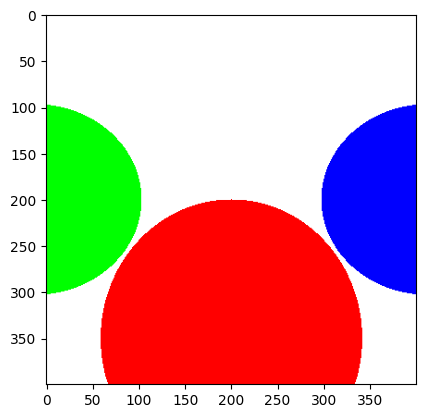

In [57]:
##################################
#
#         RAYTRACER 
#
##################################

# Αρχικοποίηση
Cw = 300
Ch = 300
canvas = Framebuffer(height=Ch, width=Cw)
# Main
O = np.array([0, 0, 0])
for x in range(-Cw//2, Cw//2):
    for y in range(-Ch//2, Ch//2):
        D = canvasToViewPort(x, y)
        color = traceRay(O, D, 1, np.inf)
        canvas.putPixel(x, y, color)
canvas.show()